In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

Combining datasets

In [2]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# NCATS
This is a pretty messy AID, but we will take what we can get, was also classified prior to pubchem upload




In [3]:
ncats = pd.read_csv("processed/ncats_adme_aid1645842.csv")

In [4]:
ncats.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type,active
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,Active,197033.0,ncats_adme_aid1645842,assay,NaN,inhibitor,True
1,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,YXOLAZRVSSWPPT-UHFFFAOYSA-N,Inconclusive,5281670.0,ncats_adme_aid1645842,assay,NaN,inhibitor,False
2,Cc1ccc(C(=O)NC2C(=O)NC(C(C)C)C(=O)N3CCCC3C(=O)...,GQBHKSFHNFMVES-TYWDLNKHSA-N,Inconclusive,6604832.0,ncats_adme_aid1645842,assay,NaN,inhibitor,False
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,Active,5280443.0,ncats_adme_aid1645842,assay,NaN,inhibitor,True
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,Inactive,836.0,ncats_adme_aid1645842,assay,NaN,inhibitor,False


In [5]:
ncats_actives = ncats.query("active == True")
ncats_actives = ncats_actives[keep_cols_all]
ncats_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
9,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,FTVWIRXFELQLPI-ZDUSSCGKSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
5225,O=S(=O)(Nc1ccccc1)c1cccc(/C=C/C(O)=NO)c1,NCNRHFGMJRPRSK-MDZDMXLPSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
5231,CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]...,CJBJHOAVZSMMDJ-HEXNFIEUSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
5232,O=C(Nc1cccc2c(=O)cc(-c3nn[nH]n3)oc12)c1ccc(OCC...,NBQKINXMPLXUET-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor
5236,CCCCCCCC/C=C\CCCCCCCC(=O)NCc1ccc(O)c(OC)c1,OPZKBPQVWDSATI-KHPPLWFESA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor


# Veith

Assay data from veith et al


In [6]:
veith = pd.read_csv("processed/veith_2009.csv")
veith.head
veith.drop(columns="SMILES", inplace=True)

In [7]:
veith_actives = veith.query("active == True")
veith_actives = veith_actives[keep_cols_all]

In [8]:
veith_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,JNCIAHUGNMSHOQ-YPKPFQOOSA-N,True,veith_2009,assay,NaN,inhibitor
1,Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1,AHWJVKKSEVAPMR-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
2,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,JGYZDKDCKPRYSN-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
3,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,OJEJKWUQFREXKZ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
5,N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c(Cl)c1,UKWNAMLDDFVOMY-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
11852,O=C1CCC[C@@H](C(C(=O)OCc2ccccc2)C(=O)OCc2ccccc...,JBDPMSUIIDZEPI-LJQANCHMSA-N,True,veith_2009,assay,NaN,inhibitor
11860,C[C@@H]1CCC2C(=O)N3C(CC[C@@H](C)[C@@H]3c3ccc(B...,WFMZEOAASVEOPI-NLWVLAFYSA-N,True,veith_2009,assay,NaN,inhibitor
11866,CC(C)=NOCc1cccc(-c2cc(-c3ccccc3)no2)c1,DIROYVYHKDBHOT-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11875,Cc1ccc(S(=O)(=O)N[C@@H](CCc2ccccc2)CC(=O)C(C)(...,KRRAOBCOGQCLCS-IBGZPJMESA-N,True,veith_2009,assay,NaN,inhibitor


# PubChem AIDS

Read in the AIDS


In [9]:
aid_883 = pd.read_csv("processed/AID_883.csv")
aid_883_actives = aid_883.query("active == True")
aid_883_actives = aid_883_actives[keep_cols_all]

In [10]:
aid_883_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
7,C#C[C@]1(O)CC[C@@H]2[C@H]3CCC4=Cc5oncc5C[C@]4(...,POZRVZJJTULAOH-OMCWFXPWSA-N,True,aid883,assay,NaN,inhibitor
18,CC(C(=O)N[C@@H](CO)Cc1ccccc1)[C@@H]1C[C@@]1(C)...,ACGNORVVGCXOJV-MQBOFBGISA-N,True,aid883,assay,NaN,inhibitor
20,COC(=O)Cn1c(C(=O)N2CCCC2)cc2c1C[C@H]1CN(C(=O)c...,BFFRNZIJUCEFRA-CUDUBCGHSA-N,True,aid883,assay,NaN,inhibitor
22,CC(C)c1ccc2c(c1)CC[C@@H]1[C@@](C)(CN)CCC[C@@]21C,JVVXZOOGOGPDRZ-AQNXPRMDSA-N,True,aid883,assay,NaN,inhibitor
25,O=C1CCC[C@@H](C(C(=O)OCc2ccccc2)C(=O)OCc2ccccc...,JBDPMSUIIDZEPI-LJQANCHMSA-N,True,aid883,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
10227,C=Cc1c(C)c2[nH]c1=Cc1[nH]c(c(=CCC(=O)O)c1C)=Cc...,BVGAXBBUIHTBCY-MIJGTKDRSA-N,True,aid883,assay,NaN,inhibitor
10243,O=C(O)C1CCCN(CCC=C(c2ccccc2)c2ccccc2)C1,TXQKSMSLZVKQBI-UHFFFAOYSA-N,True,aid883,assay,NaN,inhibitor
10244,COC(=O)[C@@]1(Cc2ccc(F)cc2)[C@H]2c3cc(C(=O)N4C...,DOJUWAWLBGUOGH-IQGXZWDMSA-N,True,aid883,assay,NaN,inhibitor
10258,COC(=O)[C@@]1(Cc2ccc(F)cc2)[C@H]2c3cc(C(=O)N(C...,OXUHCCPXOYBXRV-RLSJRWLLSA-N,True,aid883,assay,NaN,inhibitor


In [11]:
aid_1024 = pd.read_csv("processed/AID_1024.csv")
aid_1024_actives = aid_1024.query("active == True")
aid_1024_actives = aid_1024_actives[keep_cols_all]

In [12]:
aid_1024_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,CCC(=O)Nc1cc(C(=O)OCC(=O)c2ccccc2Cl)ccc1C,SECDJSMBHLPXJB-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
135,Cc1ccc(OCCCOc2cccc3cccnc23)cc1C,VTOXFJAGHCHRAY-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
373,O=C(NCc1ccccn1)c1cc(-c2ccccc2Cl)on1,HFJLJWXTBKGWLF-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
380,COc1ccccc1C(=O)Nc1ccc(NC(=O)c2ccco2)c(C)c1,RWYPMJGROADASO-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
499,Cc1oc2cc(O)ccc2c(=O)c1Oc1ccc2ccccc2c1,QIIZNHXDDPRFQN-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
95014,COc1cccc(C(=O)Nc2c(C(N)=O)oc3ccccc23)c1,ARLNYGOQDMCXLP-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
95046,COc1ccc(NC(=O)c2cc(C(C)C)on2)c(OC)c1,LXQCUETZOSFEKK-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
95128,CCCCOC(=O)Cn1c(=O)oc2ccc(C)cc21,IRHGBUIZKJMYES-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor
95160,COc1ccccc1CNC(=O)C1CCCN(S(=O)(=O)c2cccc3cccnc2...,CRRGYIAOFWLBPC-UHFFFAOYSA-N,True,aid1024,assay,NaN,inhibitor


In [13]:
aid_1919973 = pd.read_csv("processed/AID_1919973.csv")
aid_1919973_actives = aid_1919973.query("active == True")
aid_1919973_actives = aid_1919973_actives[keep_cols_all]

In [14]:
aid_1919973_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,IZQSVPBOUDKVDZ-UHFFFAOYSA-N,True,aid1919973,assay,NaN,inhibitor
1,CC(=O)c1c(O)c(C)c(O)c2c1OC1=CC(=O)C(C(C)=O)C(=...,CUCUKLJLRRAKFN-KKIBXBACSA-N,True,aid1919973,assay,NaN,inhibitor
2,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,True,aid1919973,assay,NaN,inhibitor
3,O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C...,RATQVALKDAUZBW-XPMKZLBQSA-N,True,aid1919973,assay,NaN,inhibitor
4,C=C[C@H]1CN2CCc3c([nH]c4ccccc34)[C@H]2C[C@@H]1...,TZUGIFAYWNNSAO-AZQGJTAVSA-N,True,aid1919973,assay,NaN,inhibitor
5,C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(O)cc(CCCCC)cc1O,QHMBSVQNZZTUGM-ZWKOTPCHSA-N,True,aid1919973,assay,NaN,inhibitor
6,O=C(OC[C@H]1O[C@@H](OC(=O)c2cc(O)c(O)c(O)c2)[C...,QJYNZEYHSMRWBK-NIKIMHBISA-N,True,aid1919973,assay,NaN,inhibitor
7,O=c1ccc2ccc(O)cc2o1,ORHBXUUXSCNDEV-UHFFFAOYSA-N,True,aid1919973,assay,NaN,inhibitor
8,CCCCC/C=C/C/C=C/CCCCCCCC(=O)O,OYHQOLUKZRVURQ-AVQMFFATSA-N,True,aid1919973,assay,NaN,inhibitor
9,OCc1cc(O)c2c(O)c3c(O)cccc3c([C@@H]3O[C@H](CO)[...,UBCKYWKJKPMKAA-RDZBXBSQSA-N,True,aid1919973,assay,NaN,inhibitor


# Chembl

The chembl data is an aggregation for CYP2D6  

Some postprocessing steps have been applied to select high quality actives from the range of assays available, defs not the only way to do this. 




* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with >=  N molecules (10)
* Select compounds with mean pChembl > 5 accross all assays
* Select compounds that appear in >= L of assays



In [15]:
chembl_actives = pd.read_csv("processed/chembl_active_selected.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,6.605556,0.438039,SULFAPHENAZOLE,9,NaN,ChEMBL_curated,True
1,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,5.821111,0.662390,NOSCAPINE HYDROCHLORIDE,9,NaN,ChEMBL_curated,True
2,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.208571,0.575975,QUERCETIN,7,NaN,ChEMBL_curated,True
3,COc1cc(CNC(=O)CCCC/C=C\C(C)C)ccc1O,YKPUWZUDDOIDPM-VURMDHGXSA-N,5.942857,0.415761,ZUCAPSAICIN,7,NaN,ChEMBL_curated,True
4,CC1=C(/C=C\C(C)=C\C=C/C(C)=C/C(=O)O)C(C)(C)CCC1,SHGAZHPCJJPHSC-ZCYUIQHQSA-N,5.200000,0.500000,NaN,7,NaN,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [16]:
fda = pd.read_csv("./FDA/fda.csv")

In [17]:
fda

,SMILES,active,common_name,action_type,FDA_recommended,dataset,INCHIKEY
0,C1=CC=C(C=C1)N2C(=CC=N2)NS(=O)(=O)C3=CC=C(C=C3)N,True,sulfaphenazole,agonist,True,FDA,QWCJHSGMANYXCW-UHFFFAOYSA-N
1,C1=CSC(=C1)C(=O)C2=C(C(=C(C=C2)OCC(=O)O)Cl)Cl,True,tienilic acid,agonist,True,FDA,AGHANLSBXUWXTB-UHFFFAOYSA-N
2,C1=CC(=C(C=C1F)F)C(CN2C=NC=N2)(CN3C=NC=N3)O,True,fluconazole,agonist,True,FDA,RFHAOTPXVQNOHP-UHFFFAOYSA-N


# Flockheart table

In [18]:
flockheart = pd.read_csv("./processed/flockheart.csv")
flockheart.drop(columns="SMILES", inplace=True)

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [19]:
combined_literature = pd.concat([ncats_actives, veith_actives, fda, aid_1024_actives, aid_1919973_actives, aid_883_actives, flockheart])
combined_literature

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN
9,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,FTVWIRXFELQLPI-ZDUSSCGKSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12,CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1,HMABYWSNWIZPAG-UHFFFAOYSA-N,True,flockheart,NaN,rucaparib,inhibitor,NaN,NaN
13,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,JLKIGFTWXXRPMT-UHFFFAOYSA-N,True,flockheart,NaN,sulfamethoxazole,inhibitor,NaN,NaN
14,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,True,flockheart,NaN,sulfaphenazole,inhibitor,NaN,NaN
15,CC(c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F,BCEHBSKCWLPMDN-YRQZNCJOSA-N,True,flockheart,NaN,voriconazole,inhibitor,NaN,NaN


In [20]:
# combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [21]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

1261

In [22]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [23]:
combined_literature_chembl = pd.concat([combined_literature, chembl_actives])

In [24]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
9,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,FTVWIRXFELQLPI-ZDUSSCGKSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5675,CCCn1c(C)nc2c(c1=O)c1nc3ccccc3nc1n2CCC1=CCCCC1,LPFPABJSBHTJFH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.25,NaN,1.0
5676,COC(=O)c1[nH]c2cc(OC)ccc2c1NC(=O)c1nonc1C,CHJMBWSTSDCIKH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.90,NaN,1.0
5677,COc1cc(C)ccc1OCCOc1cc(C)ccc1Cl,UVAOBHSWJTXPCD-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.10,NaN,1.0
5678,CCNC(=S)NNC(=O)c1cc(CC(C)C)nc2ccccc12,MYTRQYCYPXKAQI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.55,NaN,1.0


In [25]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
True    3
Name: count, dtype: int64

In [26]:
combined_literature_chembl.dataset.value_counts()

dataset
ChEMBL_curated           5680
veith_2009               4043
ncats_adme_aid1645842    2039
aid1024                  1368
aid883                   1315
aid1919973                 35
flockheart                 17
FDA                         3
Name: count, dtype: int64

In [27]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

4297

In [28]:
combined_literature_chembl.INCHIKEY.isna().sum()

0

In [29]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
9,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,FTVWIRXFELQLPI-ZDUSSCGKSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5675,CCCn1c(C)nc2c(c1=O)c1nc3ccccc3nc1n2CCC1=CCCCC1,LPFPABJSBHTJFH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.25,NaN,1.0
5676,COC(=O)c1[nH]c2cc(OC)ccc2c1NC(=O)c1nonc1C,CHJMBWSTSDCIKH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.90,NaN,1.0
5677,COc1cc(C)ccc1OCCOc1cc(C)ccc1Cl,UVAOBHSWJTXPCD-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.10,NaN,1.0
5678,CCNC(=S)NNC(=O)c1cc(CC(C)C)nc2ccccc12,MYTRQYCYPXKAQI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.55,NaN,1.0


In [30]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AAAQFGUYHFJNHI-GOSISDBHSA-N,1
AABFWJDLCCDJJN-UHFFFAOYSA-N,1
AABYLPRACHMDSN-BIWBPYCESA-N,2
AABYLPRACHMDSN-REETXPBOSA-N,3
AACNFBWTGDBFJF-UHFFFAOYSA-N,1
...,...
ZZWKZQDOSJAGGF-WLNFFEQUSA-N,1
ZZXVFLBULNNLCU-UHFFFAOYSA-N,1
ZZZBYLFRFPPGEA-GASCZTMLSA-N,1


In [31]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

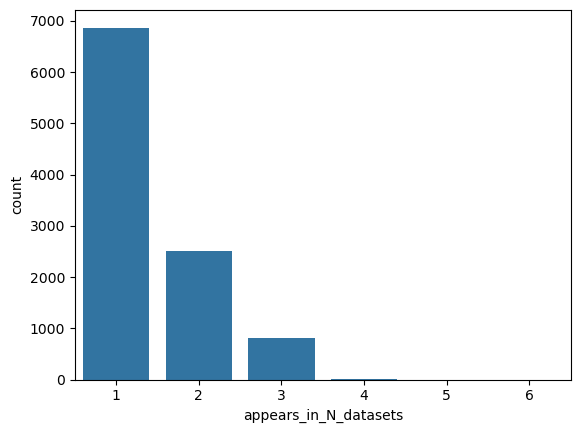

In [32]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [33]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
1,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
2,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,3
3,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
4,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,FTVWIRXFELQLPI-ZDUSSCGKSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,CCCn1c(C)nc2c(c1=O)c1nc3ccccc3nc1n2CCC1=CCCCC1,LPFPABJSBHTJFH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.25,NaN,1.0,2
14496,COC(=O)c1[nH]c2cc(OC)ccc2c1NC(=O)c1nonc1C,CHJMBWSTSDCIKH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.90,NaN,1.0,1
14497,COc1cc(C)ccc1OCCOc1cc(C)ccc1Cl,UVAOBHSWJTXPCD-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.10,NaN,1.0,2
14498,CCNC(=S)NNC(=O)c1cc(CC(C)C)nc2ccccc12,MYTRQYCYPXKAQI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.55,NaN,1.0,2


In [34]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_aid1024,dataset_aid1919973,dataset_aid883,dataset_flockheart,dataset_ncats_adme_aid1645842,dataset_veith_2009,INCHIKEY
0,False,False,False,False,False,False,True,False,JNODQFNWMXFMEV-UHFFFAOYSA-N
1,False,False,False,False,False,False,True,False,KZNIFHPLKGYRTM-UHFFFAOYSA-N
2,False,False,False,False,False,False,True,False,LFBZZHVSGAHQPP-UHFFFAOYSA-N
3,False,False,False,False,False,False,True,False,GFNNBHLJANVSQV-UHFFFAOYSA-N
4,False,False,False,False,False,False,True,False,FTVWIRXFELQLPI-ZDUSSCGKSA-N
...,...,...,...,...,...,...,...,...,...
14495,True,False,False,False,False,False,False,False,LPFPABJSBHTJFH-UHFFFAOYSA-N
14496,True,False,False,False,False,False,False,False,CHJMBWSTSDCIKH-UHFFFAOYSA-N
14497,True,False,False,False,False,False,False,False,UVAOBHSWJTXPCD-UHFFFAOYSA-N
14498,True,False,False,False,False,False,False,False,MYTRQYCYPXKAQI-UHFFFAOYSA-N


In [35]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [36]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [37]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,...,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_aid1024,dataset_aid1919973,dataset_aid883,dataset_flockheart,dataset_ncats_adme_aid1645842,dataset_veith_2009
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,...,NaN,1,False,False,False,False,False,False,True,False
1,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,...,NaN,1,False,False,False,False,False,False,True,False
2,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,...,NaN,3,True,False,False,False,True,False,True,False
3,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,...,NaN,1,False,False,False,False,False,False,True,False
4,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,FTVWIRXFELQLPI-ZDUSSCGKSA-N,True,ncats_adme_aid1645842,assay,NaN,inhibitor,NaN,NaN,NaN,...,NaN,1,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,CCCn1c(C)nc2c(c1=O)c1nc3ccccc3nc1n2CCC1=CCCCC1,LPFPABJSBHTJFH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.25,...,1.0,2,True,False,False,False,False,False,False,True
14496,COC(=O)c1[nH]c2cc(OC)ccc2c1NC(=O)c1nonc1C,CHJMBWSTSDCIKH-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.90,...,1.0,1,True,False,False,False,False,False,False,False
14497,COc1cc(C)ccc1OCCOc1cc(C)ccc1Cl,UVAOBHSWJTXPCD-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.10,...,1.0,2,True,False,False,False,False,False,False,True
14498,CCNC(=S)NNC(=O)c1cc(CC(C)C)nc2ccccc12,MYTRQYCYPXKAQI-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.55,...,1.0,2,True,False,False,False,False,False,False,True


In [38]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
inhibitor    8901
agonist         3
Name: count, dtype: int64

In [39]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

10203

In [40]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

14274

In [41]:
# we can just sort by appears_in_N_ChEMBL_assays to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_ChEMBL_assays", "appears_in_N_datasets"], ascending=[False,False],  inplace=True)


In [42]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_40863/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_40863/1877288904.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [43]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

13994

In [44]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [45]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_aid1024,dataset_aid1919973,dataset_aid883,dataset_flockheart,dataset_ncats_adme_aid1645842,dataset_veith_2009
8820,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,True,SULFAPHENAZOLE,NaN,NaN,NaN,6.605556,0.438039,9.0,5,True,True,False,False,True,True,True,False
8821,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,True,NOSCAPINE HYDROCHLORIDE,NaN,NaN,NaN,5.821111,0.662390,9.0,4,True,False,False,False,True,False,True,True
8822,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,True,QUERCETIN,NaN,NaN,NaN,5.208571,0.575975,7.0,6,True,False,False,True,True,True,True,True
8823,COc1cc(CNC(=O)CCCC/C=C\C(C)C)ccc1O,YKPUWZUDDOIDPM-VURMDHGXSA-N,True,ZUCAPSAICIN,NaN,NaN,NaN,5.942857,0.415761,7.0,2,True,False,False,False,True,False,False,False
8824,CC1=C(/C=C\C(C)=C\C=C/C(C)=C/C(=O)O)C(C)(C)CCC1,SHGAZHPCJJPHSC-ZCYUIQHQSA-N,True,NaN,NaN,NaN,NaN,5.200000,0.500000,7.0,2,True,False,False,False,True,False,False,False


In [46]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

8820     True
8821    False
8822    False
8823    False
8824    False
        ...  
8717    False
8804    False
8811    False
8812    False
8816    False
Name: INCHIKEY, Length: 14500, dtype: bool

In [47]:
# combined_literature_chembl_w_counts["FDA_recommended"] = combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

In [48]:
combined_literature_chembl_w_counts["FDA_recommended"] = fda_reccomends_mask

In [49]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [50]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("inhibitor")

In [51]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_ChEMBL_assays"].fillna(0) + combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [52]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [53]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [54]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_aid1024,dataset_aid1919973,dataset_aid883,dataset_flockheart,dataset_ncats_adme_aid1645842,dataset_veith_2009,inclusion_score
8820,Nc1ccc(S(=O)(=O)Nc2ccnn2-c2ccccc2)cc1,QWCJHSGMANYXCW-UHFFFAOYSA-N,True,SULFAPHENAZOLE,inhibitor,NaN,True,6.605556,0.438039,9.0,5,True,True,False,False,True,True,True,False,14.0
8821,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2O...,AKNNEGZIBPJZJG-MSOLQXFVSA-N,True,NOSCAPINE HYDROCHLORIDE,inhibitor,NaN,False,5.821111,0.662390,9.0,4,True,False,False,False,True,False,True,True,13.0
8822,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,True,QUERCETIN,inhibitor,NaN,False,5.208571,0.575975,7.0,6,True,False,False,True,True,True,True,True,13.0
8826,CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1,WHQCHUCQKNIQEC-UHFFFAOYSA-N,True,BENZBROMARONE,inhibitor,NaN,False,7.824000,0.293053,6.0,4,True,False,False,False,True,False,True,True,10.0
8827,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...,ZNNLBTZKUZBEKO-UHFFFAOYSA-N,True,GLYBURIDE,inhibitor,NaN,False,5.498333,0.314351,6.0,4,True,False,False,False,True,False,True,True,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,C=C1CC[C@@H](O)C/C1=C/C=C1\CCC[C@]2(C)[C@@H]1C...,MECHNRXZTMCUDQ-IUKVNADRSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,False,1.0
7542,COc1cccc2oc(-c3ccc(O)cc3)cc(=O)c12,SOXQLRMCWAKIPS-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,False,1.0
7556,O=c1cc(-c2cccc(O)c2)oc2cc(O)ccc12,DYARIVMCYYQNNQ-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,False,1.0
7564,O=c1c(O)c(-c2cccc(O)c2)oc2ccccc12,QZESEGHSLFKZIV-UHFFFAOYSA-N,True,NaN,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,False,1.0


In [55]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)

<Axes: xlabel='inclusion_score', ylabel='count'>

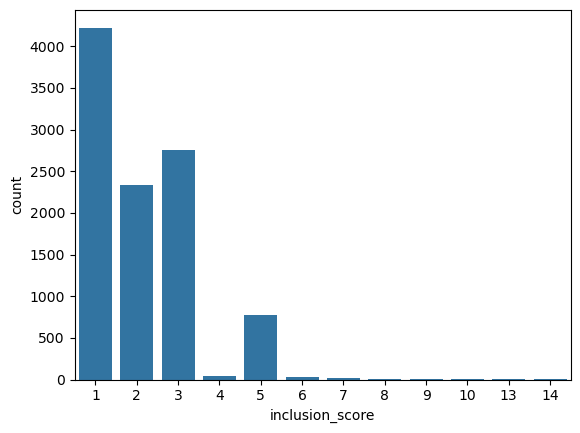

In [56]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

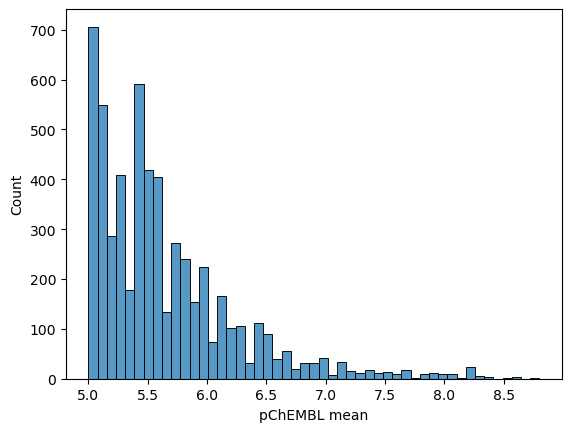

In [57]:
sns.histplot(combined_literature_chembl_w_counts, x="pChEMBL mean")

In [58]:
combined_literature_chembl_w_counts["action_type"].value_counts()

action_type
inhibitor    10202
agonist          1
Name: count, dtype: int64